In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

data_train = pd.read_csv('E:/deep_learning/titanic/train.csv')

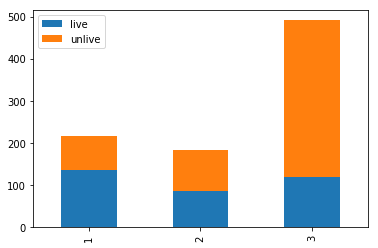

In [3]:
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'live': Survived_1, u'unlive': Survived_0})
df.plot(kind='bar', stacked=True)
plt.show()

F:\anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
F:\anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
F:\anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


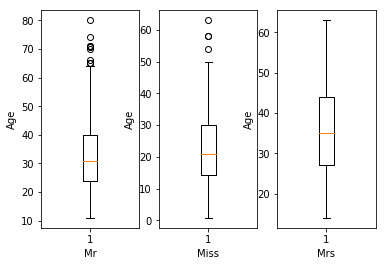

In [4]:
data_train_Mr = data_train.Age[data_train.Name.str.contains('Mr')][data_train.Age.notnull()].as_matrix()
data_train_Miss = data_train.Age[data_train.Name.str.contains('Miss')][data_train.Age.notnull()].as_matrix()
data_train_Mrs = data_train.Age[data_train.Name.str.contains('Mrs')][data_train.Age.notnull()].as_matrix()
plt.subplot(131)
plt.boxplot(data_train_Mr)
plt.xlabel('Mr')
plt.ylabel('Age')
plt.subplot(132)
plt.boxplot(data_train_Miss)
plt.xlabel('Miss')
plt.ylabel('Age')
plt.subplot(133)
plt.boxplot(data_train_Mrs)
plt.xlabel('Mrs')
plt.ylabel('Age')
plt.show()

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


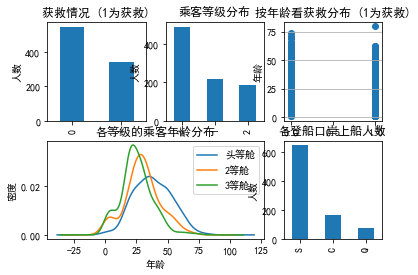

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['font.family']='sans-serif' 
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
fig = plt.figure()
fig.set(alpha=0.2) # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0)) # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# 柱状图
plt.title(u"获救情况 (1为获救)") # 标题
plt.ylabel(u"人数") # Y轴标签

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar") # 柱状图显示
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age) #为散点图传入数据
plt.ylabel(u"年龄") # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y')
plt.title(u"按年龄看获救分布 (1为获救)")

plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde') # 密度图
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")
plt.show()

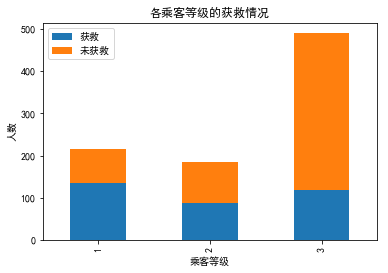

In [5]:
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts() # 未获救
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts() # 获救
df = pd.DataFrame({u'获救':Survived_1,u'未获救':Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title(u'各乘客等级的获救情况')
plt.xlabel(u'乘客等级')
plt.ylabel(u'人数')
plt.show()

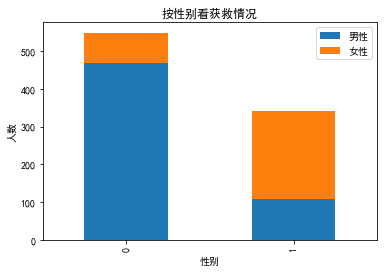

In [6]:
Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'男性':Survived_m,u'女性':Survived_f})
df.plot(kind = 'bar', stacked = True)
plt.title(u'按性别看获救情况')
plt.xlabel(u'性别')
plt.ylabel(u'人数')
plt.show()

F:\anaconda\envs\tensorflow-gpu\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "bast". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


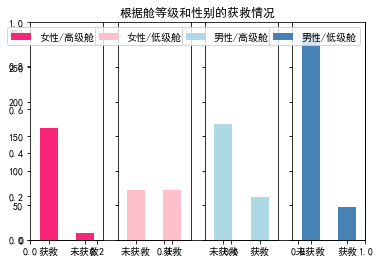

In [7]:
fig = plt.figure()
plt.title(u'根据舱等级和性别的获救情况')

ax1 = fig.add_subplot(141) # 将图像分为1行4列，从左到右从上到下的第1块
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind = 'bar', label = 'female high class', color = '#FA2479')
ax1.set_xticklabels([u'获救',u'未获救'], rotation = 0) # 根据实际填写标签
ax1.legend([u'女性/高级舱'], loc = 'best')

ax2 = fig.add_subplot(142, sharey = ax1) # 将图像分为1行4列，从左到右从上到下的第2块
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind = 'bar', label = 'female low class', color = 'pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3 = fig.add_subplot(143, sharey = ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind = 'bar', label = 'male high class', color = 'lightblue')
ax3.set_xticklabels([u'未获救',u'获救'], rotation = 0)
plt.legend([u'男性/高级舱'], loc = 'best')

ax4 = fig.add_subplot(144, sharey = ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind = 'bar', label = 'male low class', color = 'steelblue')
ax4.set_xticklabels([u'未获救',u'获救'], rotation = 0)
plt.legend([u'男性/低级舱'], loc = 'bast')
plt.show()

<Figure size 432x288 with 0 Axes>

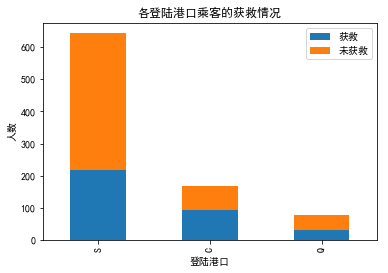

In [8]:
fig = plt.figure()
fig.set(alpha = 0.2)
Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救':Survived_1,u'未获救':Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title(u'各登陆港口乘客的获救情况')
plt.xlabel(u'登陆港口')
plt.ylabel(u'人数')
plt.show()

In [9]:
g = data_train.groupby(['SibSp','Survived']) # 数据分组
df = pd.DataFrame(g.count()['PassengerId'])
print (df)
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print (df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


<Figure size 432x288 with 0 Axes>

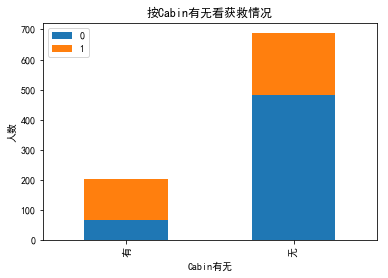

In [10]:
fig = plt.figure()
fig.set(alpha = 0.2)

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df = pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind = 'bar', stacked = True)
plt.title(u'按Cabin有无看获救情况')
plt.xlabel(u'Cabin有无')
plt.ylabel(u'人数')
plt.show()

In [11]:
#我们将测试集导入，再将删除Survived数据的训练集与测验集进行合并，这样便于进行数据处理
data_test = pd.read_csv('E:/deep_learning/titanic/test.csv') # 导入测验集数据

y = data_train['Survived'] # 将训练集Survived 数据存储在y中
del data_train['Survived'] # 删除训练集Survived数据

sum_id = data_test['PassengerId'] # 存储测试集乘客ID

df = pd.merge(data_train, data_test,how='outer') # 合并无Survived数据的训练集与测验集，how = ‘outer’ 意为并集

#删掉无关因素
df = df.drop(['Name','PassengerId','Ticket','Cabin'],axis=1) # 删除姓名、ID、船票信息、客舱信息，axis=0 删除行，=1 删除列

#缺失数据填充
df['Age'] = df['Age'].fillna(df['Age'].mean())  # 用平均值填充空值
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Embarked'] = df['Embarked'].fillna( df['Embarked'].value_counts().index[0]) # 用数量最多项填充

#将性别与港口用哑变量表示
dumm = pd.get_dummies(df[['Sex','Embarked']]) # '哑变量'矩阵
df = df.join(dumm)
del df['Sex'] // 删除
del df['Embarked']

#数据降维
df['Age'] = (df['Age']-df['Age'].min()) /(df['Age'].max()-df['Age'].min())

df['Fare'] = (df['Fare']-df['Fare'].min()) /(df['Fare'].max()-df['Fare'].min())

#训练模型
data_train = df[:len(data_train)] # 将合并后的数据分离
data_test = df[len(data_train):]

SyntaxError: can't delete operator (<ipython-input-11-d685625faaa9>, line 22)

In [12]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
